## Mr. Mint : Le blog francophone dédié au Machine Learning

## Tutorial sur l'implémentation de régression logistique sur le jeu de données Iris

### Ce Notebook est l'implémentation de régression logistique sur le jeu de données Iris . Il sert comme support de [l'article du même tutorial] (https://mrmint.fr)


#### Note : Ce notebook est écrit en Python 3 et utilise la distribution [Anaconda](https://www.anaconda.com)

### Chargement des diverses librairies utiles pour ce notebook 

In [1]:
# chargement de bibliothéques 
"""
instruction specifique pour utiliser matplotlib dans un notebook 
quand on utilise les notebooks Jupyter pour utiliser Matplotlib
"""
%matplotlib inline  

import numpy as np  # Chargement de numpy
import matplotlib.pyplot as plt # import de Matplotlib
from sklearn import datasets # chargement du package datasets contenant plusieurs jeu de données
from sklearn.linear_model import LogisticRegression # import de classe LogisticRegression qui permet d'en entrainer un

In [2]:
# importer le jeux données 
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2] # Utiliser les deux premiers colonnes afin d'avoir un problème de classification binaire. 
y = (iris.target != 0) * 1 # re-etiquettage des fleurs pour se retrouver avec deux classes au lieu de trois

### Visualisation du jeu de données

Text(0,0.5,'Sepal Width')

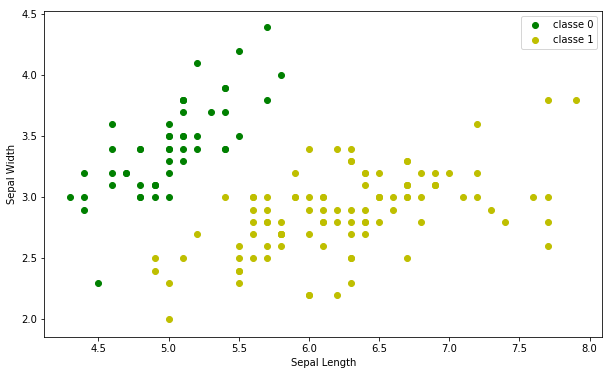

In [4]:
plt.figure(figsize=(10,6)) # Taille de la figure
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0') # En Vert les fleurs ayant l'étiquette 0
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1') # en Jaune les fleurs ayant l'étiquette 1
plt.legend(labels = ("classe 0", "classe 1"));
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

### Entrainement d'un modèle de régression logistique


Note : 

le paramètre C valorisé à (1e20 == 1 * 10^20) permet de jouer sur la régularisation. Ce paramètre sert à optimiser 
le modèle obtenu pour éviter notamment l'overfitting

Ici on a donné une valeur grande (1e20) pour C pour "réduire au maximum" l'effet de régularisation. Une valeur trop 
petite induira une régularisation forte.

In [5]:
model = LogisticRegression(C=1e20) # construction d'un objet de Régression logistique

In [6]:
%time model.fit(X, y) # Entrainement du modèle
# la fonction %time est juste pour calculer le temps pris pour entrainer le modèle

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.24 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Modèle obtenu

Le fonction de score (voir article [logistic regression](https://mrmint.fr/logistic-regression-machine-learning-introduction-simple) est définie comme suit : 


\begin{align}
S(X^{(i)}) = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2}
\end{align}

avec :
* $x_{1}$ la variable explicative "Sepal Length" 
* $x_{2}$ la variable "Sepal Width"

Les différents $\theta_{i}$ sont les coefficients du modèle. A noter que $\theta_{0}$ se nomme aussi "intercept"

Les coefficients de notre modèle entrainé peuvent se retrouver comme suit : 


In [7]:
model.intercept_, model.coef_

(array([-80.62725491]), array([[ 31.61988897, -28.31500665]]))

Ainsi notre fonction score est définit comme suit : 

\begin{align}
S(X) = -80.62725491 + 31.61988897 * x_{1} + -28.31500665 * x_{2}
\end{align}

notes : 
* les valeurs des $\theta$ peuvent varié un peu en fonction des valeurs calculées par la fonction fit()
* la fonction de score $ S(X) $ est la fonction sur laquelle on appliquera la fonction logistique (nommée aussi fonction sigmoid) pour obtenir des probabilités d'appartenance à une classe

## Prédiction du type de nouvelles Iris

Vu qu'on a utilisé la totalité du jeu de données pour entrainer notre modèle de régression logistique, nous allons donner des valeurs au hasard de taille de longeur et de largeur de Sepal. On demandera au modèle prédictif de nous indiquer la classe de chacunes de ces observations.

In [8]:
# définition de quatre observations
Iries_To_Predict = [
    [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]
]

# demande de prédiction
model.predict(Iries_To_Predict)

array([1, 1, 0, 0])